# Preface

Objectives:
1. Learn to use the `keras` API
2. Explore how performance of fully connected neural networks depend on its hyper-parameters
3. Explore the effect of learning rate and batch size on training and testing performance

In [1]:
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sns.set(font_scale=1.5)

# The Fashion MNIST Dataset

As mentioned in class the saying,
> *If you model works for MNIST, it may not work for anything else, but if it doesn't work for MNIST, it won't work for anything else*

Here in this notebook you will go beyond the MNIST dataset, albeit only a little bit. We will use the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset, which is designed to replace MNIST as the new minimal dataset to test vision tasks. 

It is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Thus, it is almost exactly like the MNIST dataset for digit recognition, but the classification problem is generally harder.


Here are some example images:
![Fashion MNIST](https://markusthill.github.io/images/2017-10-12-zalandos-fashion-mnist-dataset/zalando10x10.jpeg)

# Importing the Dataset

Just like MNIST, this dataset is found in the `tf.keras.datasets` module.

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


The following is a dictionary of labels that will map the y_train/y_test labels into words

In [3]:
label_dict = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot',
}
labels_train = [label_dict[u] for u in y_train]
labels_test = [label_dict[u] for u in y_test]

Text(0.5, 1, 'Label = Ankle boot')

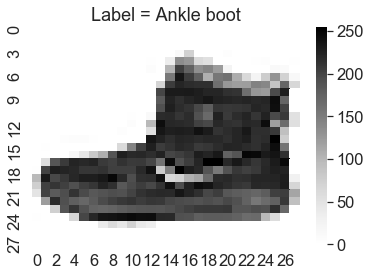

In [5]:
ax = sns.heatmap(x_train[0], cmap='Greys')
ax.set_title(f'Label = {labels_train[0]}')

# Task 1: Build a Shallow NN for Classification

Build and train a shallow (one-hidden-layer) neural network with 128 hidden nodes to classify these images. Remember to perform appropriate preprocessing steps, such as normalization and one-hot representations.

Evaluate carefully the performance of your training and the final model's performance. Discuss any interesting phenomena you discover.

## Flatenning the data matrix and normalizing the pixel values by dividing 255:

In [6]:
x_train = x_train.reshape(-1, 784) / 255.0
x_test = x_test.reshape(-1, 784) / 255.0

In [7]:
print(y_train)

[9 0 0 ... 3 0 5]


## Converting to one-hot encoding:

In [8]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [9]:
print(y_train[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [10]:
from tensorflow.keras import Sequential

In [11]:
from tensorflow.keras.layers import Dense

## Building the neural network model:

In [12]:
model = Sequential()

## Adding a layer of 128 nodes, and an output layer of 10 nodes:

In [13]:
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [15]:
from tensorflow.keras.optimizers import SGD

## Use categorical crossentropy loss function, and stochastic gradient descent at learning rate = 0.25:

In [16]:
model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.25), metrics=['accuracy'])

In [17]:
history = model.fit(x=x_train,
                    y=y_train,
                    epochs=200,
                    batch_size=1000,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 2s 29us/sample - loss: 0.9650 - accuracy: 0.6608 - val_loss: 0.6519 - val_accuracy: 0.7641
Epoch 2/200
60000/60000 [==============================] - 1s 15us/sample - loss: 0.6208 - accuracy: 0.7782 - val_loss: 0.6219 - val_accuracy: 0.7733
Epoch 3/200
60000/60000 [==============================] - 1s 15us/sample - loss: 0.5492 - accuracy: 0.8041 - val_loss: 0.5259 - val_accuracy: 0.8139
Epoch 4/200
60000/60000 [==============================] - 1s 15us/sample - loss: 0.5114 - accuracy: 0.8179 - val_loss: 0.4932 - val_accuracy: 0.8255
Epoch 5/200
60000/60000 [==============================] - 1s 16us/sample - loss: 0.4755 - accuracy: 0.8318 - val_loss: 0.4963 - val_accuracy: 0.8205
Epoch 6/200
60000/60000 [==============================] - 1s 16us/sample - loss: 0.4537 - accuracy: 0.8396 - val_loss: 0.5017 - val_accuracy: 0.8085
Epoch 7/200
60000/60000 [=========================

In [18]:
import pandas as pd

In [19]:
history = pd.DataFrame(history.history)

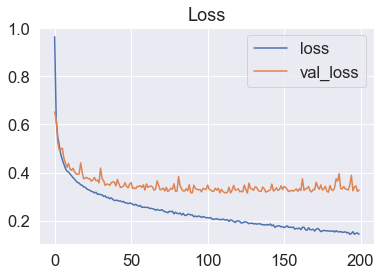

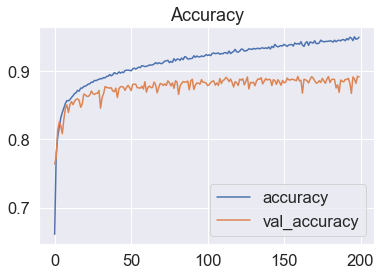

In [20]:
history.plot(y=['loss', 'val_loss'], title='Loss')
history.plot(y=['accuracy', 'val_accuracy'], title='Accuracy')

## Variance(fluctuation) of loss and accuracy can be observed in the plots above, they can attributed to the dynamics of SGD. Besides, valuation loss is higher than training loss while valuation accuracy is lower than training accuracy. These phenomena represent overfitting.

In [21]:
from sklearn.metrics import classification_report

In [22]:
y_test_predict = model.predict(x_test)

In [23]:
print(classification_report(y_true=y_test.argmax(1), y_pred=y_test_predict.argmax(1)))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.80      0.81      0.81      1000
           3       0.87      0.92      0.90      1000
           4       0.82      0.81      0.82      1000
           5       0.97      0.97      0.97      1000
           6       0.75      0.69      0.72      1000
           7       0.93      0.97      0.95      1000
           8       0.98      0.96      0.97      1000
           9       0.98      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
cmatrix = confusion_matrix(y_true=y_test.argmax(1), y_pred=y_test_predict.argmax(1))

In [26]:
print(cmatrix)

[[877   1  16  20   4   2  76   0   4   0]
 [  4 967   2  18   4   0   5   0   0   0]
 [ 20   1 810  15  85   0  68   0   1   0]
 [ 23   4   9 920  16   0  24   0   4   0]
 [  0   1  85  47 809   0  58   0   0   0]
 [  0   0   0   1   0 967   0  20   1  11]
 [138   0  80  27  60   0 690   0   5   0]
 [  0   0   0   0   0  19   0 968   1  12]
 [  7   0   5   7   4   5   5   3 963   1]
 [  1   0   0   0   0   7   0  45   0 947]]


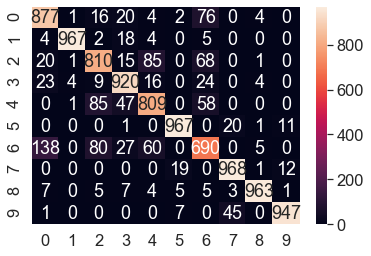

In [27]:
sns.heatmap(cmatrix, annot=True, fmt="d")

In [29]:
import numpy as np

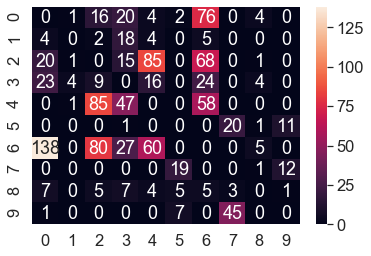

In [30]:
np.fill_diagonal(cmatrix, 0)
sns.heatmap(cmatrix, annot=True, fmt="d")

## It can be observed from the confusion matrix that there are more significaant errors between: 
'0: T-shirt/top' and '6: Shirt';  
'2: Pullover' and '4: Coat';  
'2: Pullover' and '6: Shirt';  
'4: Coat' and '6: Shirt';  
'7: Sneaker' and '9: Ankle boot'  
which can be explained by their resemblance in some cases.

# Task 2: Dependence on Hyper-parameters

Now, investigate the dependence of the neural network's performance on some hyper-parameters. In particular, investigate the dependence on the following:

1. Number of hidden nodes
2. The activation function
3. Loss functions

Discuss any interesting findings. 

# 1. model2 is built with 256 nodes, double the number of the previous model.

In [31]:
model2 = Sequential()

In [32]:
model2.add(Dense(units=256, activation='relu'))
model2.add(Dense(units=10, activation='softmax'))

In [33]:
model2.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.25), metrics=['accuracy'])

In [34]:
history2 = model2.fit(x=x_train,
                    y=y_train,
                    epochs=200,
                    batch_size=1000,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 2s 37us/sample - loss: 0.9433 - accuracy: 0.6836 - val_loss: 0.6252 - val_accuracy: 0.7850
Epoch 2/200
60000/60000 [==============================] - 1s 18us/sample - loss: 0.6074 - accuracy: 0.7849 - val_loss: 0.5872 - val_accuracy: 0.7907
Epoch 3/200
60000/60000 [==============================] - 1s 19us/sample - loss: 0.5368 - accuracy: 0.8106 - val_loss: 0.5022 - val_accuracy: 0.8218
Epoch 4/200
60000/60000 [==============================] - 1s 19us/sample - loss: 0.4993 - accuracy: 0.8241 - val_loss: 0.5598 - val_accuracy: 0.8037
Epoch 5/200
60000/60000 [==============================] - 1s 19us/sample - loss: 0.4680 - accuracy: 0.8342 - val_loss: 0.4619 - val_accuracy: 0.8397
Epoch 6/200
60000/60000 [==============================] - 1s 18us/sample - loss: 0.4449 - accuracy: 0.8421 - val_loss: 0.4928 - val_accuracy: 0.8218
Epoch 7/200
60000/60000 [=========================

## It can be observed that the training loss is lower and training accuracy is higher with double the number of nodes. However, there is no observed improvement of validation loss and validation accuracy. As a result, the gap between training and validation loss/accuracy widens, suggesting more overfitting.

In [36]:
history2 = pd.DataFrame(history2.history)

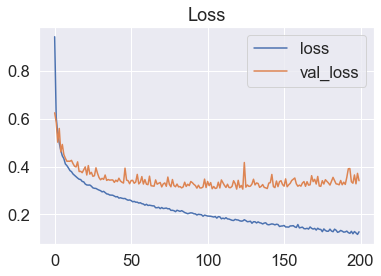

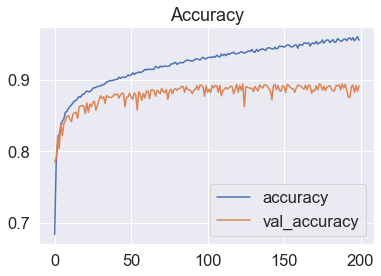

In [37]:
history2.plot(y=['loss', 'val_loss'], title='Loss')
history2.plot(y=['accuracy', 'val_accuracy'], title='Accuracy')

In [38]:
y_test_predict2 = model2.predict(x_test)

In [39]:
print(classification_report(y_true=y_test.argmax(1), y_pred=y_test_predict2.argmax(1)))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84      1000
           1       0.99      0.98      0.98      1000
           2       0.72      0.90      0.80      1000
           3       0.92      0.89      0.90      1000
           4       0.86      0.78      0.82      1000
           5       0.97      0.96      0.97      1000
           6       0.74      0.73      0.73      1000
           7       0.96      0.95      0.95      1000
           8       0.97      0.96      0.97      1000
           9       0.95      0.97      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.90      0.89      0.89     10000
weighted avg       0.90      0.89      0.89     10000



In [40]:
cmatrix2 = confusion_matrix(y_true=y_test.argmax(1), y_pred=y_test_predict2.argmax(1))

In [41]:
print(cmatrix2)

[[801   1  38  15   4   2 128   0  11   0]
 [  2 977   3  10   5   0   3   0   0   0]
 [  8   1 899   5  38   0  46   0   3   0]
 [ 19   5  29 886  36   0  22   0   3   0]
 [  0   0 147  16 781   0  54   0   2   0]
 [  0   0   0   1   0 963   0  17   1  18]
 [ 71   4 121  22  45   0 727   0  10   0]
 [  0   0   0   0   0  17   0 948   0  35]
 [  5   0  10   5   2   3   7   3 965   0]
 [  0   0   0   0   0   7   1  23   0 969]]


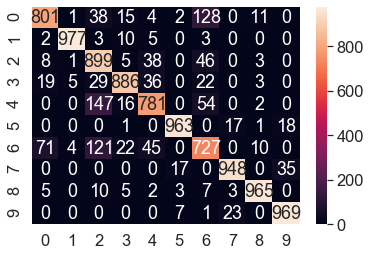

In [42]:
sns.heatmap(cmatrix2, annot=True, fmt="d")

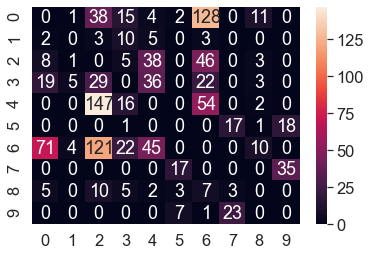

In [43]:
np.fill_diagonal(cmatrix2, 0)
sns.heatmap(cmatrix2, annot=True, fmt="d")

## It can be observed from the confusion matrix that the confused pairs mentioned before are still present.

# 2. model3 is built with 128 nodes but with sigmoid activation function.

In [44]:
model3 = Sequential()

In [45]:
model3.add(Dense(units=128, activation='sigmoid'))
model3.add(Dense(units=10, activation='softmax'))

In [46]:
model3.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.25), metrics=['accuracy'])

In [47]:
history3 = model3.fit(x=x_train,
                    y=y_train,
                    epochs=200,
                    batch_size=1000,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 3s 49us/sample - loss: 1.4041 - accuracy: 0.6316 - val_loss: 0.9656 - val_accuracy: 0.7239
Epoch 2/200
60000/60000 [==============================] - 1s 15us/sample - loss: 0.8332 - accuracy: 0.7431 - val_loss: 0.7627 - val_accuracy: 0.7509
Epoch 3/200
60000/60000 [==============================] - 1s 16us/sample - loss: 0.7034 - accuracy: 0.7646 - val_loss: 0.6842 - val_accuracy: 0.7620
Epoch 4/200
60000/60000 [==============================] - 1s 16us/sample - loss: 0.6403 - accuracy: 0.7814 - val_loss: 0.6353 - val_accuracy: 0.7755
Epoch 5/200
60000/60000 [==============================] - 1s 16us/sample - loss: 0.5997 - accuracy: 0.7920 - val_loss: 0.6035 - val_accuracy: 0.7868
Epoch 6/200
60000/60000 [==============================] - 1s 15us/sample - loss: 0.5704 - accuracy: 0.8027 - val_loss: 0.5775 - val_accuracy: 0.7981
Epoch 7/200
60000/60000 [=========================

## Generally, the training/validation loss/accuracy are not as good as the original case.

In [48]:
history3 = pd.DataFrame(history3.history)

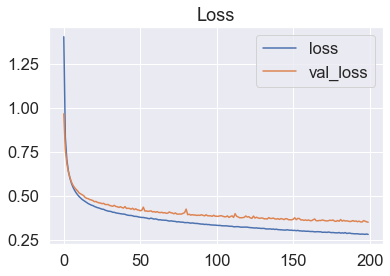

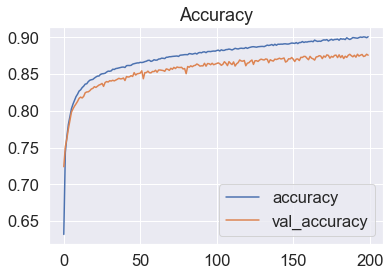

In [49]:
history3.plot(y=['loss', 'val_loss'], title='Loss')
history3.plot(y=['accuracy', 'val_accuracy'], title='Accuracy')

## It can be observed that there are less variance/fluctuation in the loss. Besides, the gap between training and validation loss/accuracy is smaller than the original case.

In [50]:
y_test_predict3 = model3.predict(x_test)

In [51]:
print(classification_report(y_true=y_test.argmax(1), y_pred=y_test_predict3.argmax(1)))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1000
           1       0.98      0.97      0.98      1000
           2       0.79      0.80      0.79      1000
           3       0.88      0.88      0.88      1000
           4       0.79      0.80      0.79      1000
           5       0.95      0.94      0.95      1000
           6       0.69      0.69      0.69      1000
           7       0.91      0.95      0.93      1000
           8       0.97      0.97      0.97      1000
           9       0.96      0.94      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [52]:
cmatrix3 = confusion_matrix(y_true=y_test.argmax(1), y_pred=y_test_predict3.argmax(1))

In [53]:
print(cmatrix3)

[[832   0  15  24   5   2 113   0   9   0]
 [  3 968   2  19   3   0   4   0   1   0]
 [ 11   1 801  15  94   0  77   0   1   0]
 [ 27  12  14 877  35   0  33   0   2   0]
 [  0   1  96  30 795   0  76   0   2   0]
 [  0   0   0   1   0 941   0  40   2  16]
 [119   2  86  28  63   1 687   0  14   0]
 [  0   0   0   0   0  30   0 947   0  23]
 [  5   1   3   3   6   2   9   4 967   0]
 [  0   0   0   0   0  12   1  44   0 943]]


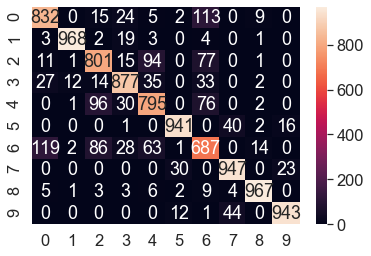

In [54]:
sns.heatmap(cmatrix3, annot=True, fmt="d")

# 3. model4 is built with mean squared error as the loss function, with other arguments same as the original model.

In [55]:
model4 = Sequential()

In [56]:
model4.add(Dense(units=128, activation='relu'))
model4.add(Dense(units=10, activation='softmax'))

In [59]:
model4.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.25), metrics=['accuracy'])

In [60]:
history4 = model4.fit(x=x_train,
                    y=y_train,
                    epochs=200,
                    batch_size=1000,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 2s 26us/sample - loss: 0.0801 - accuracy: 0.4096 - val_loss: 0.0697 - val_accuracy: 0.5583loss: 0.0857 - 
Epoch 2/200
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0625 - accuracy: 0.5845 - val_loss: 0.0566 - val_accuracy: 0.6213
Epoch 3/200
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0519 - accuracy: 0.6630 - val_loss: 0.0488 - val_accuracy: 0.6749
Epoch 4/200
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0460 - accuracy: 0.6949 - val_loss: 0.0445 - val_accuracy: 0.7033
Epoch 5/200
60000/60000 [==============================] - 1s 16us/sample - loss: 0.0425 - accuracy: 0.7220 - val_loss: 0.0419 - val_accuracy: 0.7185
Epoch 6/200
60000/60000 [==============================] - 1s 16us/sample - loss: 0.0402 - accuracy: 0.7400 - val_loss: 0.0399 - val_accuracy: 0.7352
Epoch 7/200
60000/60000 [==========

In [61]:
history4 = pd.DataFrame(history4.history)

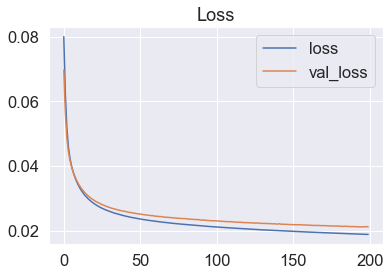

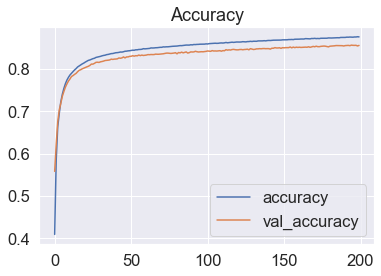

In [62]:
history4.plot(y=['loss', 'val_loss'], title='Loss')
history4.plot(y=['accuracy', 'val_accuracy'], title='Accuracy')

## It can be observed that there is very little variance/fluctuation in the loss. Besides, the gap between training and validation loss/accuracy is the smallest among the cases. The loss is also the smallest among the cases, but training/validation accuracy does not show improvement.

In [64]:
y_test_predict4 = model4.predict(x_test)

In [65]:
print(classification_report(y_true=y_test.argmax(1), y_pred=y_test_predict4.argmax(1)))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1000
           1       0.98      0.96      0.97      1000
           2       0.77      0.75      0.76      1000
           3       0.85      0.87      0.86      1000
           4       0.75      0.78      0.76      1000
           5       0.95      0.94      0.94      1000
           6       0.65      0.61      0.63      1000
           7       0.92      0.93      0.93      1000
           8       0.94      0.95      0.94      1000
           9       0.95      0.96      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.85      0.86      0.85     10000
weighted avg       0.85      0.86      0.85     10000



In [66]:
cmatrix4 = confusion_matrix(y_true=y_test.argmax(1), y_pred=y_test_predict4.argmax(1))

In [67]:
print(cmatrix4)

[[807   2  14  45   6   3 108   0  15   0]
 [  5 956   1  26   5   0   5   0   2   0]
 [ 18   5 752  10 123   2  82   0   8   0]
 [ 30  10   9 868  38   1  38   0   6   0]
 [  0   2  95  32 784   1  79   0   7   0]
 [  0   0   0   2   0 937   0  40   3  18]
 [134   2 104  34  90   1 613   0  22   0]
 [  0   0   0   0   0  32   0 931   0  37]
 [  4   1   6   7   4   3  21   5 949   0]
 [  0   0   0   0   0   8   0  35   1 956]]


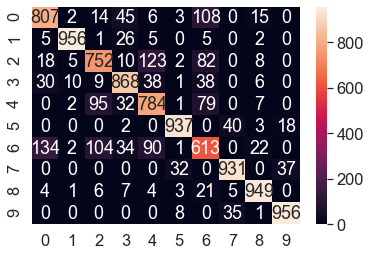

In [68]:
sns.heatmap(cmatrix4, annot=True, fmt="d")

## As a summary, increasing nodes results in better test accuracy but not validation accuracy. Besides, relu and categorical cross entropy appears to be the most suitable activation function and loss function among the cases.